<a href="https://colab.research.google.com/github/jweir136/AirQuality-Purely-Time-Series-/blob/master/AirQuality(Time_Series).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score, learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

%matplotlib inline

data = pd.read_csv("AirQualityUCI.csv", sep=';', parse_dates=['Date', 'Time'])

In [0]:
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M', errors='ignore')


In [29]:
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,2004-10-03,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,2004-10-03,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,2004-10-03,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,2004-10-03,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,2004-10-03,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [30]:
data['AH'].autocorr()

0.9545347668690033

There is a high autocorrelation here, so time series may be very good.

In [35]:
data.isnull().any()

Date              True
Time             False
CO(GT)            True
PT08.S1(CO)       True
NMHC(GT)          True
C6H6(GT)          True
PT08.S2(NMHC)     True
NOx(GT)           True
PT08.S3(NOx)      True
NO2(GT)           True
PT08.S4(NO2)      True
PT08.S5(O3)       True
T                 True
RH                True
AH                True
Unnamed: 15       True
Unnamed: 16       True
dtype: bool

In [36]:
data.isnull().sum()

Date              114
Time                0
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

In [0]:
data.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1, inplace=True)

In [0]:
data.dropna(inplace=True)

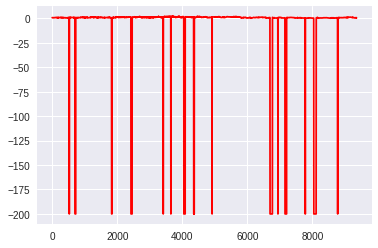

In [32]:
plt.plot([a for a in range(len(data['AH']))], data['AH'].values, 'r-')
plt.show()

In [0]:
X = data['AH'].shift(1).dropna().values
y = data['AH'].values

trainX, testX, trainY, testY = train_test_split(X, y[1:], test_size=.2)

In [0]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LinearRegression())
])

In [0]:
kfold = KFold(n_splits=10)
score = cross_val_score(pipe, trainX.reshape(-1, 1), trainY.reshape(-1, 1), cv=kfold)

In [58]:
score.mean()

0.8955511410847781

In [59]:
score.std()

0.04165412555056632

In [0]:
pipe.fit(trainX.reshape(-1, 1), trainY.reshape(-1, 1))
preds = pipe.predict(testX.reshape(-1, 1))

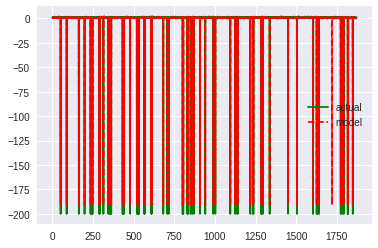

In [62]:
plt.plot([a for a in range(len(testY))], testY, 'g-', label='actual')
plt.plot([a for a in range(len(preds))], preds, 'r--', label='model')
plt.legend()
plt.show()

Looks like the reason for underperforming is that is falsely predicted a spike towards the end.  It also fell a little short on the magnitude for the spikes.